# Homework 1
## Tianyu Yang


### Problem 1

1.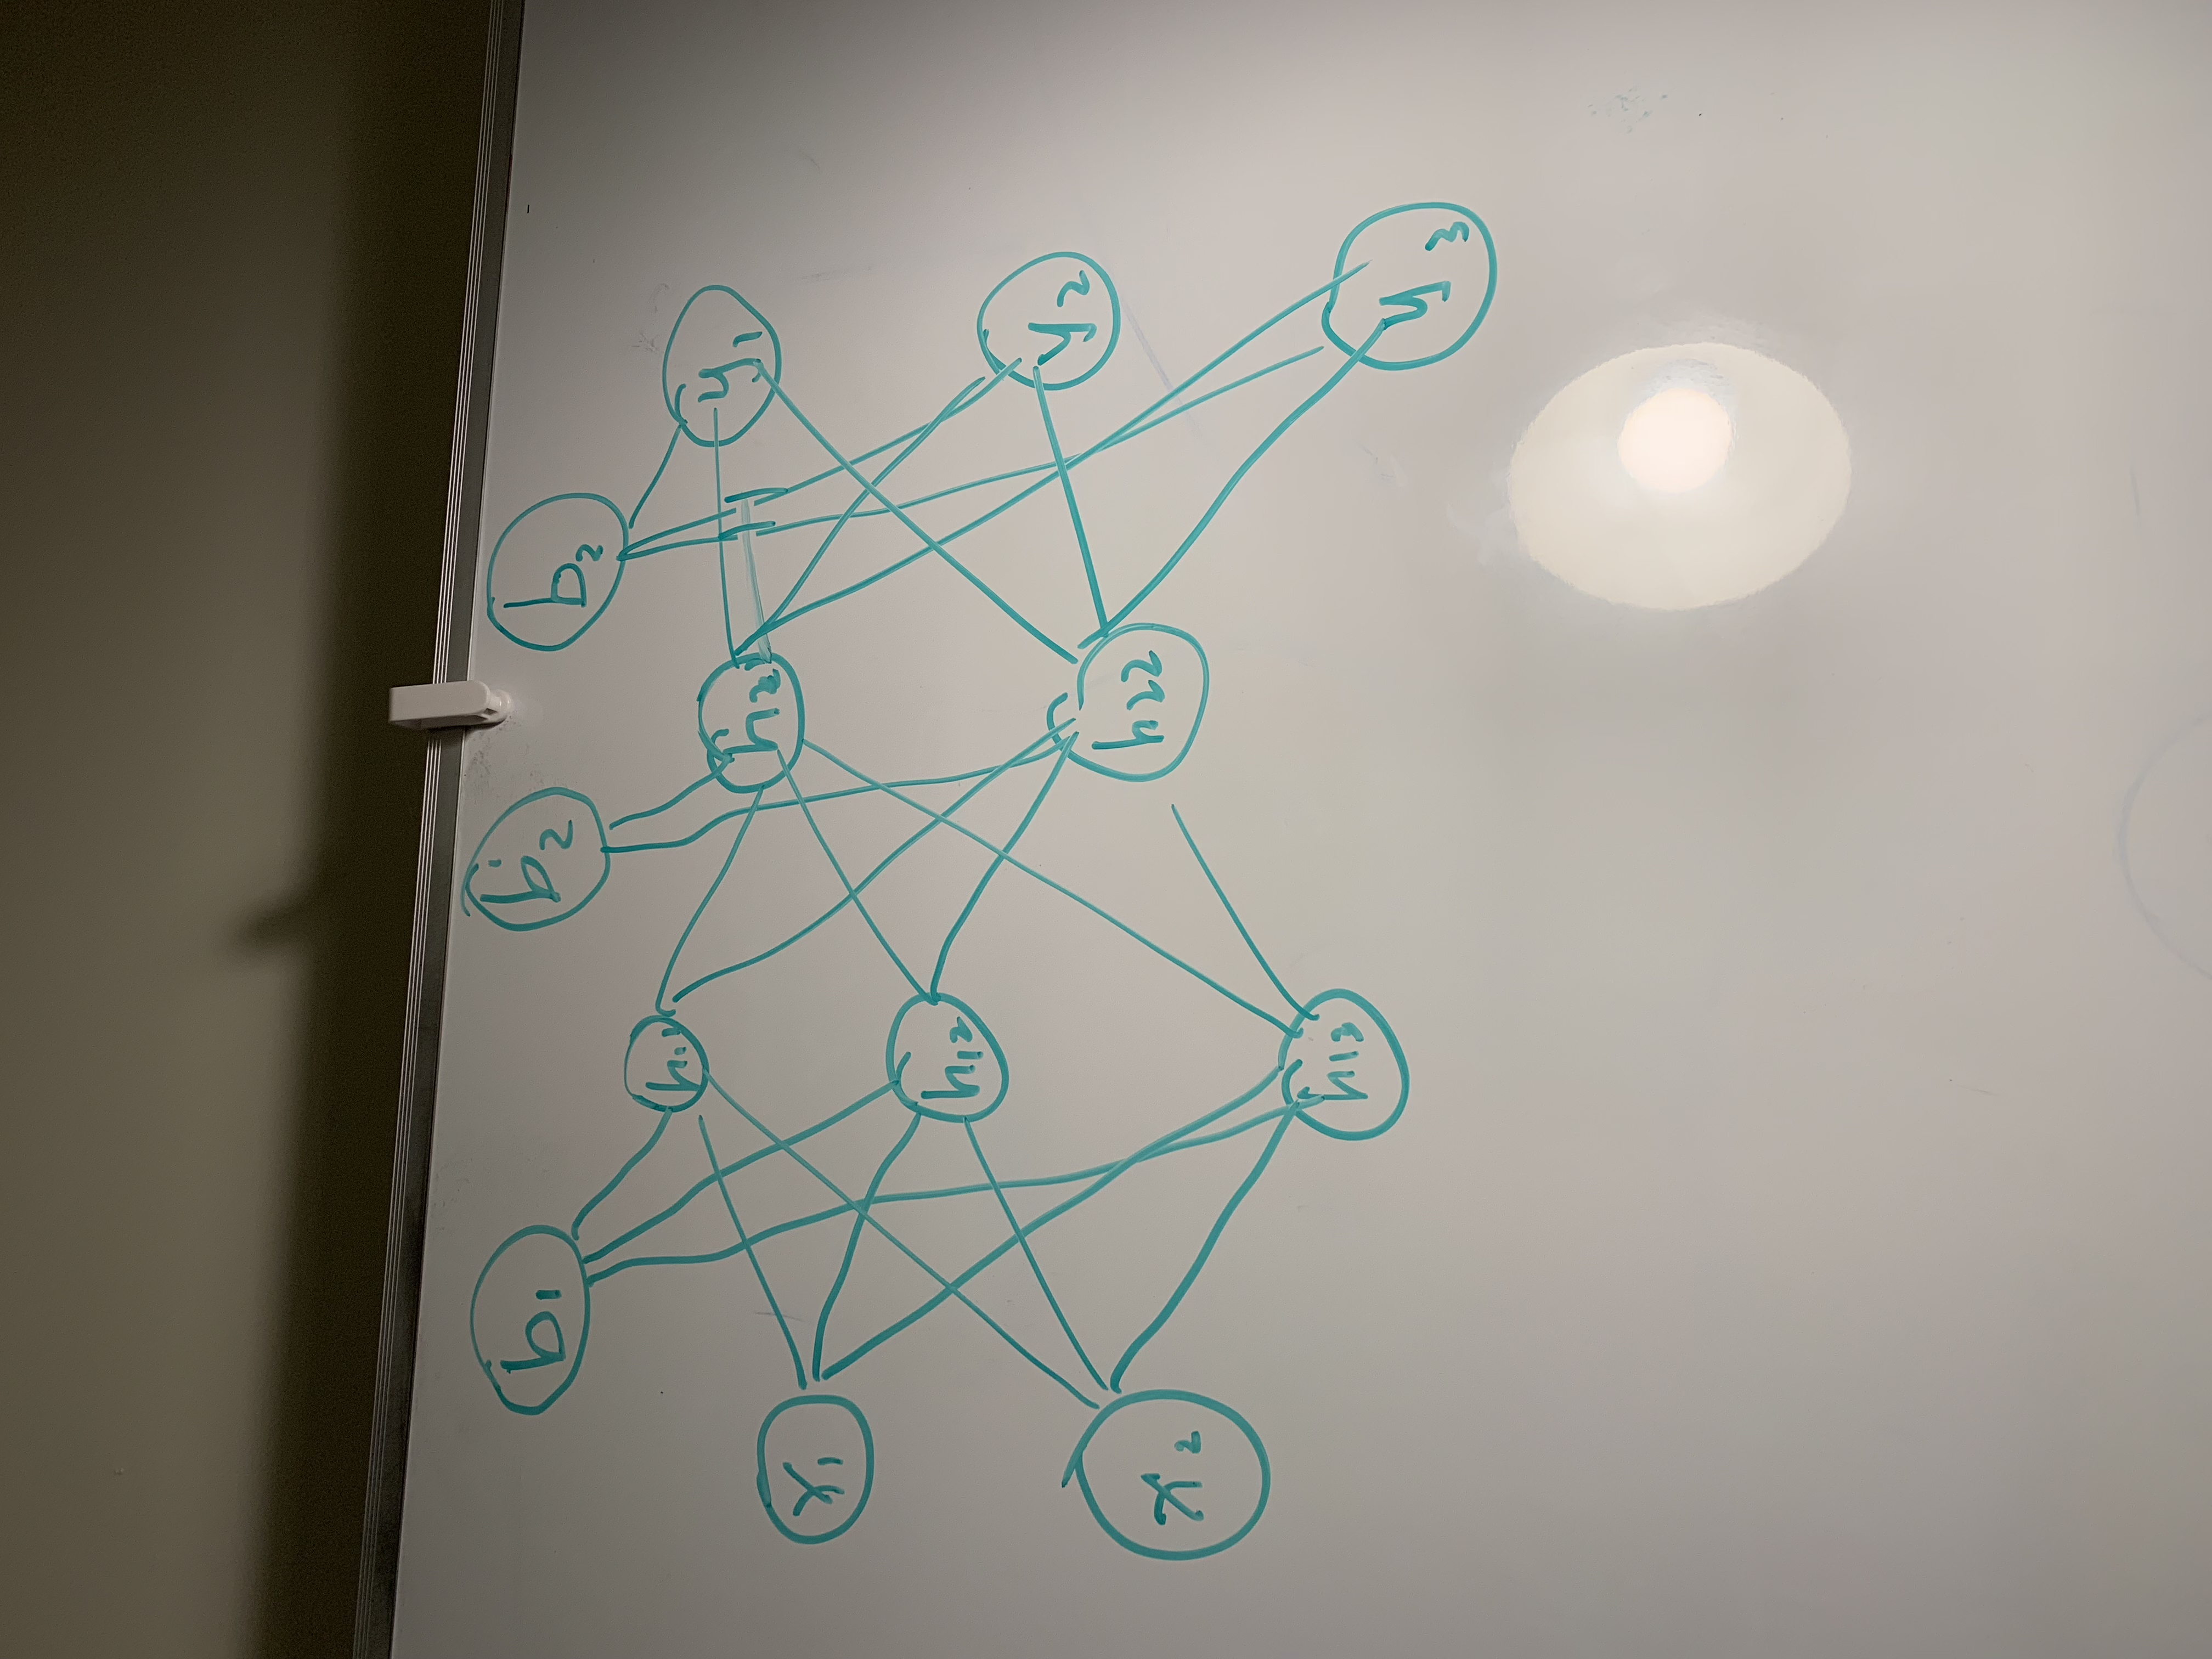

2. $nn(x) = softmax(\max(0,\max(0,XW_1+b_1)W_2+b_2)W_3+b_3)$ where $softmax(x_i) =  \frac{e^x_i}{\sum_{i = 1}^{n} e^x_i}$

In [8]:
import numpy as np

In [9]:
def softmax(ys):
    return np.exp(ys)/np.sum(np.exp(ys))
def relu(x):
    return np.maximum(x,0)
def ff_nn_2_ReLu(x,w1,w2,w3, b1,b2,b3):
    layer1 = relu(w1@x+b1.reshape(3,-1))
    layer2 = relu(w2@layer1+b2.reshape(2,-1))
    output = np.apply_along_axis(softmax,1,w3@layer2+b3.reshape(3,-1))
    return output
x = np.array([[1,0,0],[-1,-1,1]])
w1 = np.array([[1,0],[-1,0],[0,0.5]])
w2 = np.array([[1,0,0],[-1,-1,0]])
b2 = np.array([1,-1])
b1 = np.array([0,0,1])
w3 = np.array([[1,1],[0,0],[-1,-1]])
b3  = np.array([1,0,0])

In [10]:
ff_nn_2_ReLu(x,w1,w2,w3,b1,b2,b3)+np.array([1,3,4]).reshape(3,-1)

array([[1.57611688, 1.21194156, 1.21194156],
       [3.33333333, 3.33333333, 3.33333333],
       [4.1553624 , 4.4223188 , 4.4223188 ]])

row i, column j represents the probability of instance j belongs to class i

### Problem 2

1.$\frac{\partial f}{\partial x} = -2(1-x)-400x(y-x^2)$<br>
  $\frac{\partial f}{\partial y} = 200(y-x^2)$

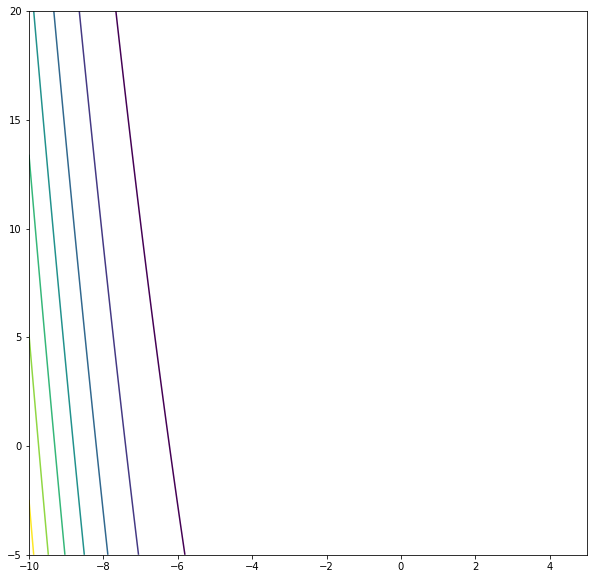

In [11]:
import matplotlib.pyplot as plt
def rosen(x,y):
    return (1-x)**2+100*(y-x**2)**2
def df(v):
    x,y = v
    return np.array([-2*(1-x)-400*x*(y-x**2),200*(y-x**2)])

plt.figure(figsize=(10,10))
x, y = np.meshgrid(np.linspace(-10, 5, 310), np.linspace(-5, 20, 310))

z = rosen(x,y)
plt.contour(x,y,z)
plt.show()

In [12]:
#2 gradient descent
def gradient_descent(starting_point  = np.array([-9,10]),iterations = 10, learning_rate =.01):
    trace = [starting_point]
    for i in range(iterations):
        starting_point = starting_point-learning_rate*df(starting_point)
  
        trace.append(starting_point)
    print('iterations', iterations)
    print('learning rate', learning_rate)
    print('Function value', rosen(*starting_point))
    print('Final Position', starting_point)
    return np.array(trace)
def variations(iterations,learning_rate):
    plt.figure(figsize=(10,10))
    x, y = np.meshgrid(np.linspace(-10, 5, 310), np.linspace(-5, 20, 310))
    z = rosen(x,y)
    plt.contour(x,y,z)
    trace = gradient_descent(learning_rate = learning_rate,iterations = iterations)
    plt.plot(trace[:,0],trace[:,1], '-o')
    plt.show()


iterations 1000000
learning rate 4e-05
Function value 2.821393209828157e-09
Final Position [1.00005307 1.00010636]


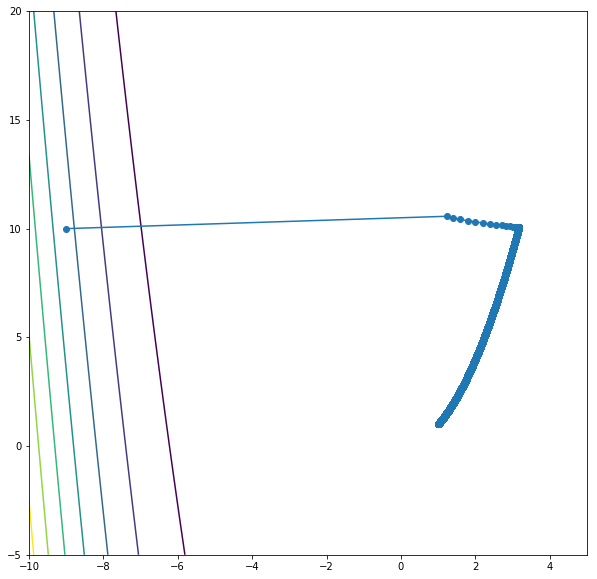

In [13]:
# since the size of the gradient rather large
# I used small learning rates with many iterations 
# the solution is (1,1) and minimum value of the function is 0
variations( iterations= 1000000,learning_rate = 0.00004)

iterations 1000000
learning rate 5e-05
Function value 2.223316569130536e-12
Final Position [1.00000149 1.00000299]


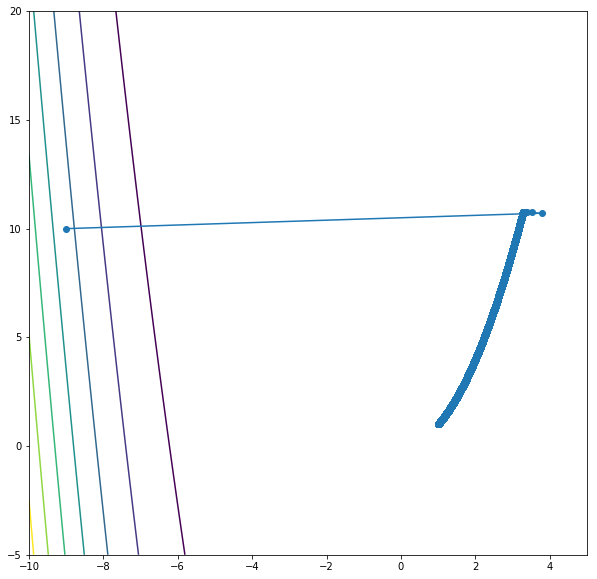

In [14]:
variations( iterations= 1000000,learning_rate = 0.00005)

iterations 1000000
learning rate 6e-05
Function value 8.755799019286449e-16
Final Position [1.00000003 1.00000006]


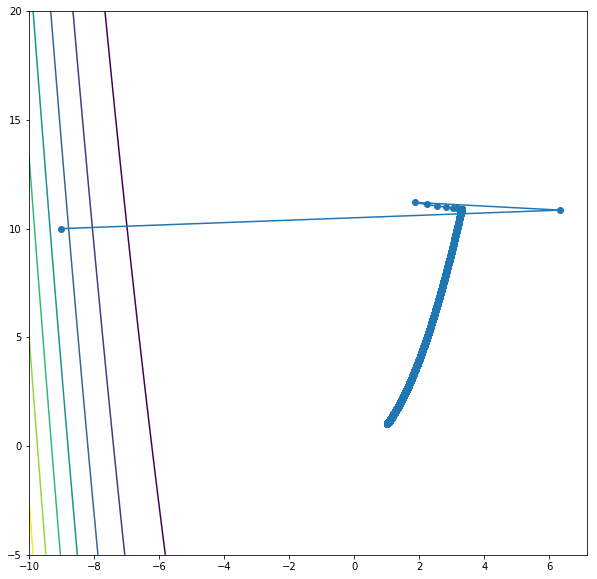

In [15]:
variations( iterations= 1000000,learning_rate = 0.00006)

iterations 1000000
learning rate 7e-05
Function value 2.451131294010465e-18
Final Position [1. 1.]


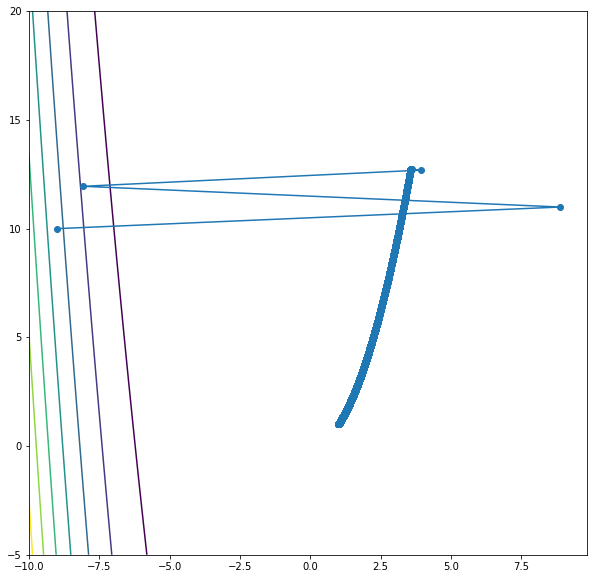

In [16]:
variations( iterations= 1000000,learning_rate = 0.00007)

In [17]:
def gradient_descent_m(starting_point  = np.array([-9,10]),iterations = 10, learning_rate =.01,alpha = 0.2):
    trace = [starting_point]
    m = np.zeros(starting_point.size)
    
    for i in range(iterations):
        grad = df(starting_point)
        m = alpha*m+learning_rate*grad
        starting_point = starting_point-m
  
        trace.append(starting_point)
    print('iterations', iterations)
    print('alpha', alpha)
    print('learning rate', learning_rate)
    print('Function value', rosen(*starting_point))
    print('Final Position', starting_point)
    return np.array(trace)
def variations_m(iterations,learning_rate,alpha):
    plt.figure(figsize=(10,10))
    x, y = np.meshgrid(np.linspace(-10, 5, 310), np.linspace(-5, 20, 310))
    z = rosen(x,y)
    plt.contour(x,y,z)
    trace = gradient_descent_m(learning_rate = learning_rate,iterations = iterations,alpha = alpha)
    plt.plot(trace[:,0],trace[:,1], '-o')
    plt.show()


iterations 1000000
alpha 0.1
learning rate 4e-05
Function value 1.2433433868033864e-10
Final Position [1.00001114 1.00002233]


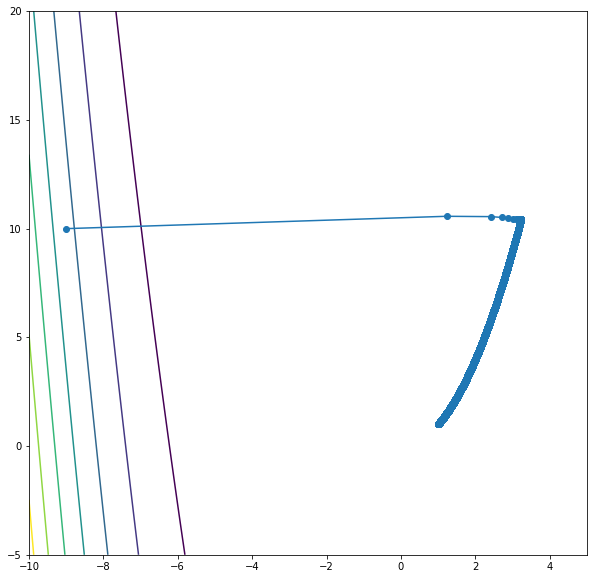

In [18]:
variations_m( iterations= 1000000,learning_rate = 0.00004,alpha = 0.1)

iterations 1000000
alpha 0.2
learning rate 4e-05
Function value 2.072719618426114e-12
Final Position [1.00000144 1.00000288]


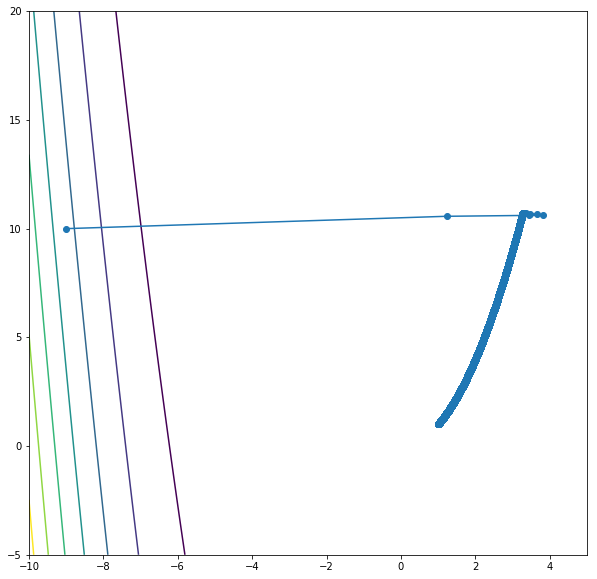

In [19]:
variations_m( iterations= 1000000,learning_rate = 0.00004,alpha = 0.2)

iterations 1000000
alpha 0.3
learning rate 4e-05
Function value 9.395596516395615e-15
Final Position [1.0000001  1.00000019]


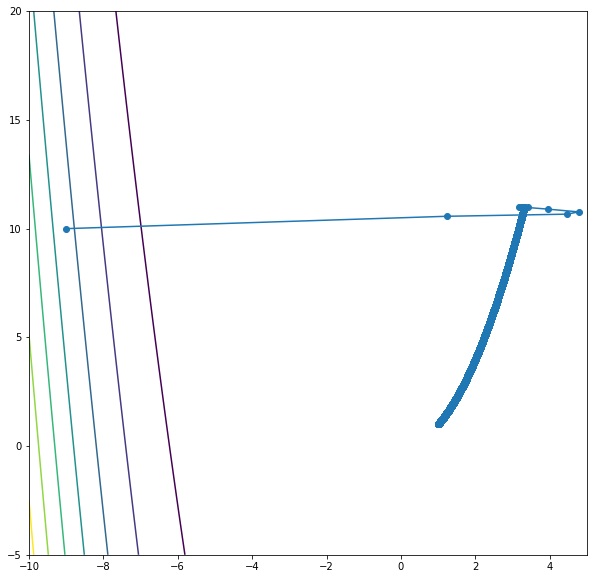

In [20]:
variations_m( iterations= 1000000,learning_rate = 0.00004,alpha = 0.3)

iterations 1000000
alpha 0.1
learning rate 5e-05
Function value 3.4207816805534776e-14
Final Position [1.00000018 1.00000037]


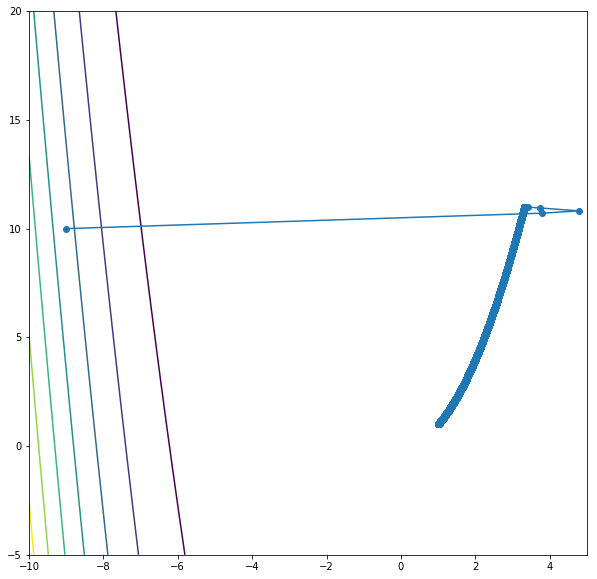

In [21]:
variations_m( iterations= 1000000,learning_rate = 0.00005,alpha = 0.1)

iterations 1000000
alpha 0.2
learning rate 5e-05
Function value 1.5806529147186938e-16
Final Position [1.00000001 1.00000003]


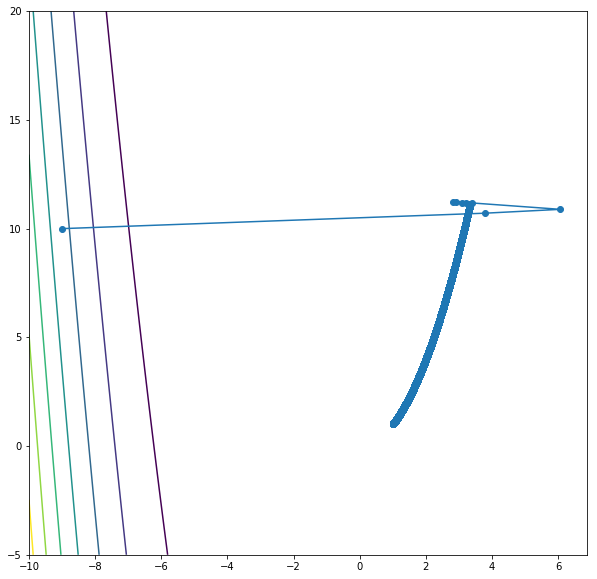

In [22]:
variations_m( iterations= 1000000,learning_rate = 0.00005,alpha = 0.2)

iterations 1000000
alpha 0.3
learning rate 5e-05
Function value 5.1215005737680186e-20
Final Position [1. 1.]


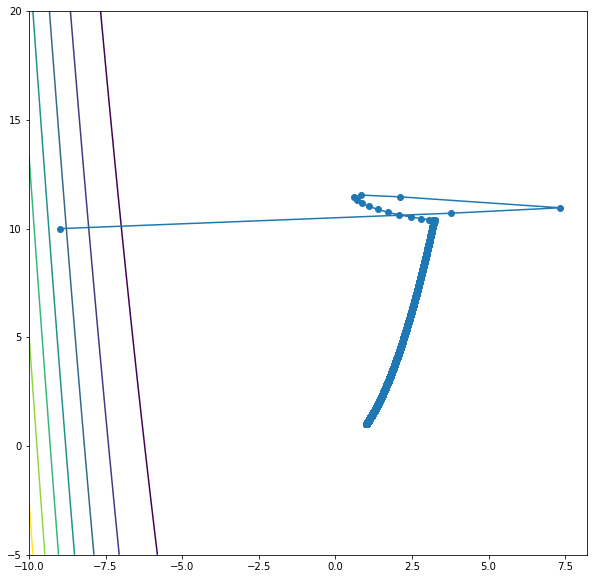

In [23]:
variations_m( iterations= 1000000,learning_rate = 0.00005,alpha = 0.3)

Since the gradient in latter iterations are roughly in the same direction, for the same learning rate, gradient descent with momentum reaches closer to the solution than regular gradient descent with same amount of iteration.

### Problem 3

#### 1
Define $\bf{a}^{(i)}, \bf{z}^{(i)}$ to be the output and input to layer $i$, ${\bf W}^{(i)}, {\bf b}^{i}$ to be the weights and biases from layer $i-1$ to layer $i$ and the row $k$ of ${\bf W}^{(i)}$ are all the weigts associated with ${\bf a}^{(i)}_{k}$. The weight matrices, and bias vectors in problem 1 are ${\bf W}^{(1)}_{3\times2}, {\bf W}^{(2)}_{2\times3}, {\bf W}^{(3)}_{3\times2 }, {\bf b}^{1}_{3\times 1}, {\bf b}^{2}_{2\times 1},{\bf b}^{3}_{3\times 1}$. We define the loss as a function of all mentioned parameters as $L(\bf{W}^{(1)}_{3\times2}, \bf{W}^{(2)}_{2\times3}, \bf{W}^{(3)}_{3\times2 }, {\bf b}^{1}_{3\times 1}, {\bf b}^{2}_{2\times 1},{\bf b}^{3}_{3\times 1})$. Let ${\bf y}_i \in \mathbb{R}^3$ to be the output of the $i$th instance and ${\bf x}_i \in \mathbb{R}^2$ to be the input of the $i$th instances. Let $relu(x)$ to be the relu function and notice that $relu'(x) = 1$ when $x >0$ and $relu'(x) = 0$ when $x<0$. Finally, define ${\bf \delta}^{(i)}$ to be the error caused by ${\bf z}^{(i)}$<br>
We will explore the loss of one instance as the total loss is merely the average of loss per instance.The backpropagation starts on the out layer and propagate the error back until the first layer of input. Since we use the softmax cross entropy as the loss, by the lecture, ${\bf \delta}^{(3)} = \frac{\partial L}{\partial {\bf z}^{(3)}} = ({\bf a}^{(3)} - {\bf y})$<br>
Then, 
$$\frac{\partial L}{\partial {\bf W}^{(3)}} = {\bf \delta}^{(3)} \frac{\partial {\bf z}^{(3)}}{\partial {\bf W}^{(3)}} = {\bf \delta}^{(3)} {\bf a}^{(2)^T}$$<br>

$$\frac{\partial L}{\partial {\bf b}^{(3)}} = \frac{\partial L}{\partial {\bf z}^{(3)}} = {\bf \delta}^{(3)}$$<br>

$${\bf \delta}^{(2)} = \frac{\partial L}{\partial {\bf z}^{(3)}}\frac{\partial {\bf z}^{(3)}}{\partial {\bf a}^{(2)}}\frac{\partial {\bf a}^{(2)}}{\partial {\bf z }^{(2)}} = {\bf W}^{(3)^T}{\bf \delta}^{(3)}\odot relu'({\bf z}^{(2)}) $$<br>

$$ \frac{\partial L}{\partial {\bf b}^{(2)}}  =  {\bf \delta}^{(2)}$$<br>

$$\frac{\partial L}{\partial {\bf W}^{(2)}} = {\bf \delta}^{(2)} \frac{\partial {\bf z}^{(2)}}{\partial {\bf W}^{(2)}} = {\bf \delta}^{(2)} {\bf a}^{(1)^T}$$<br>

$${\bf \delta}^{(1)} = \frac{\partial L}{\partial {\bf z}^{(3)}}\frac{\partial {\bf z}^{(3)}}{\partial {\bf a}^{(2)}}\frac{\partial {\bf a}^{(2)}}{\partial {\bf z }^{(2)}} \frac{\partial {\bf z}^{(2)}}{\partial {\bf a}^{(1)}}\frac{\partial {\bf a}^{(1)}}{\partial {\bf z }^{(1)}}= {\bf W}^{(2)^T}{\bf \delta}^{(2)}\odot relu'({\bf z}^{(1)}) $$<br>

$$ \frac{\partial L}{\partial {\bf b}^{(1)}}  =  {\bf \delta}^{(1)}$$<br>

$$\frac{\partial L}{\partial {\bf W}^{(1)}} = {\bf \delta}^{(1)} \frac{\partial {\bf z}^{(1)}}{\partial {\bf W}^{(1)}} = {\bf \delta}^{(1)} {\bf x}^{T}$$<br>
The gradient of the average loss are the average of the gradients over $m$ instances ie, $$\frac{\partial L}{\partial {\bf b}^{(3)}} = 1/m \sum_{i = 1}^{m} {\bf \delta}_{i}^{(3)}$$<br>

$$\frac{\partial L}{\partial {\bf W}^{(3)}} =  1/m \sum_{i = 1}^{m} {\bf \delta}_{i}^{(3)} {\bf a}_{i}^{(2)^T}$$<br>

$$ \frac{\partial L}{\partial {\bf b}^{(2)}}  =1/m \sum_{i = 1}^{m}  {\bf \delta}_{i}^{(2)}$$<br>

$$\frac{\partial L}{\partial {\bf W}^{(2)}} =1/m \sum_{i = 1}^{m}  {\bf \delta}_{i}^{(2)} {\bf a}_{i}^{(1)^T}$$<br>

$$\frac{\partial L}{\partial {\bf b}^{(1)}} =1/m \sum_{i = 1}^{m}  {\bf \delta}_{i}^{(1)}$$<br>

$$\frac{\partial L}{\partial {\bf W}^{(1)}} = 1/m \sum_{i = 1}^{m} {\bf \delta}_{i}^{(1)} {\bf x}_{i}^{T}$$<br>

### 2

In [38]:
def drelu(x):
    return np.where(x>0 , 1, 0)

def forwardpass(x,w1, b1,w2,b2,w3,b3):
    z1 = x@w1.T+b1.T

    a1  = relu(z1)
    z2  = a1@w2.T +b2.T
    a2 = relu(z2)
    z3 = a2@w3.T+b3.T
    a3 = np.apply_along_axis(softmax,1,z3)
    return z1,a1,z2,a2,z3,a3

def loss(a3, ys):
    
    l = 0
    for i in range(a3.shape[0]):
        l -= (ys[i]@a3[i].T).reshape(-1)[0]
    return l

def grad_f(x,w1, b1,w2,b2,w3,b3,ys):
    
    z1,a1,z2,a2,z3,a3 = forwardpass(x,w1, b1,w2,b2,w3,b3)
    
    nw1 = np.zeros((3,2))
    nb1= np.zeros((3,1))
    nw2 =np.zeros((2,3))
    nb2 =np.zeros((2,1))
    nw3 = np.zeros((3,2))
    nb3 = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        del3 = (a3[i].reshape(3,1) - ys[i].reshape(3,1))
      
        nb3+= del3
        nw3 +=  del3@a2[i].reshape(1,2)
        del2 = w3.T@del3*drelu(z2[i].reshape(2,1))
        nb2 += del2
        nw2 += del2@a1[i].reshape(1,3)
        del1 = w2.T@del2*drelu(z1[i].reshape(3,1))
        nb1 += del1
        nw1 += del1@x[i].reshape(1,2)
    

    return [nw1,nb1,nw2,nb2,nw3,nb3, a3]




### 3

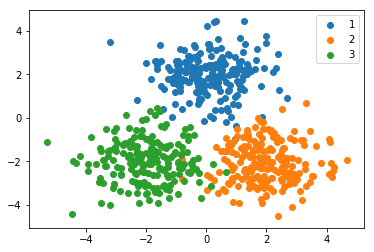

In [39]:
X_1 = np.random.multivariate_normal([0,2],[[1,0],[0,1]],200)
X_2 = np.random.multivariate_normal([2,-2],[[1,0],[0,1]],200)
X_3 = np.random.multivariate_normal([-2,-2],[[1,0],[0,1]],200)
Y_1 = np.array([[1,0,0] for i in range(200)])
Y_2 = np.array([[0,1,0] for i in range(200)])
Y_3 = np.array([[0,0,1] for i in range(200)])
plt.scatter(X_1[:,0], X_1[:,1], label = '1')
plt.scatter(X_2[:,0], X_2[:,1], label = '2')
plt.scatter(X_3[:,0], X_3[:,1], label = '3')
plt.legend()
plt.show()

In [40]:
X = np.r_[X_1,X_2,X_3]
Y = np.r_[Y_1,Y_2,Y_3]
X= np.random.permutation(np.c_[X,Y])
Y = X[:,2:]
X = X[:,:2]
X_train = X[:400, :]
Y_train = Y[:400,:]
X_test = X[400:,:]
Y_test = Y[400:,:]

-376.3121999012572


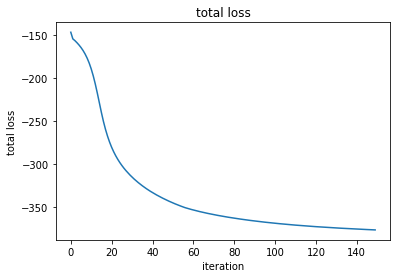

In [50]:
def nn_gradient_descent(X_train,Y_train,weights,iterations = 10, learning_rate = 0.5):
    losses = []
    for i in range(iterations):
        gradients = grad_f(X_train,*weights, Y_train)
        losses.append(loss(gradients[-1],Y_train))
        gradients = gradients[:-1]
        for j in range(len(weights)):
            weights[j]-= learning_rate*gradients[j]
    plt.plot(list(range(iterations)), losses)
    plt.title('total loss')
    plt.xlabel('iteration')
    plt.ylabel('total loss')
    print(losses[-1])
    #return weights
# random initialization
np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
w3 =np.random.uniform(size =(3,2))
b3 =np.random.uniform(size = (3,1))
weights = [w1,b1,w2,b2,w3,b3]
nn_gradient_descent(X_train,Y_train,weights,iterations = 150, learning_rate = 0.0005)

-383.9885796557868


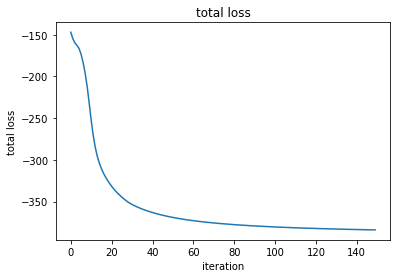

In [53]:
def nn_gradient_descent_m(X_train,Y_train,weights,iterations = 10, learning_rate = 0.5, momentum = 0.2):
    losses = []
    ms= [np.zeros(i.shape) for i in weights]
    for i in range(iterations):
        gradients = grad_f(X_train,*weights, Y_train)
        losses.append(loss(gradients[-1],Y_train))
        gradients = gradients[:-1]
        
        for j in range(len(weights)):
            ms[j] = momentum*ms[j]+gradients[j]*learning_rate
            weights[j]-= ms[j]
    print(losses[-1])
    plt.plot(list(range(iterations)), losses)
    plt.title('total loss with momentum {}'.format(momentum))
    plt.title('total loss')
    plt.xlabel('iteration')
    plt.ylabel('total loss')
    #return weights
# random initialization
np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
w3 =np.random.uniform(size =(3,2))
b3 =np.random.uniform(size = (3,1))
weights = [w1,b1,w2,b2,w3,b3]

nn_gradient_descent_m(X_train,Y_train,weights,iterations = 150, learning_rate = 0.0005,momentum = 0.5)

-390.85406488571937


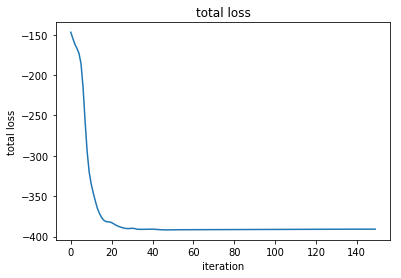

In [54]:
np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
w3 =np.random.uniform(size =(3,2))
b3 =np.random.uniform(size = (3,1))
weights = [w1,b1,w2,b2,w3,b3]

nn_gradient_descent_m(X_train,Y_train,weights,iterations = 150, learning_rate = 0.0005,momentum = 0.9)

-379.438719257108


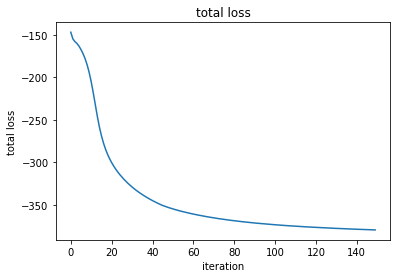

In [55]:
np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
w3 =np.random.uniform(size =(3,2))
b3 =np.random.uniform(size = (3,1))

weights = [w1,b1,w2,b2,w3,b3]

nn_gradient_descent_m(X_train,Y_train,weights,iterations = 150, learning_rate = 0.0005,momentum = 0.2)

Gradient descent with moments converges more efficiently as it reaches a lower loss than regular gradient descent in the same amount of iteration for many reasonable values of of momentum. When the momentum parameter equals 0.9, it also converges faster